In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

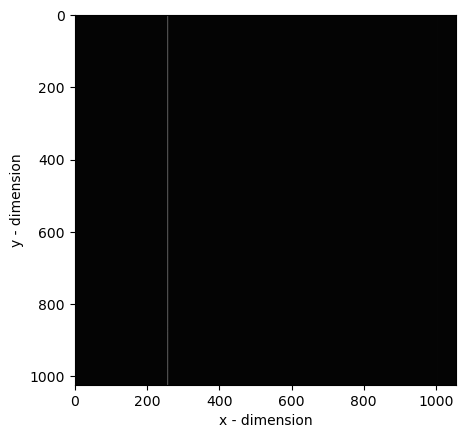

In [2]:

#opening the bias0.1 file
hdul = fits.open('bias01.fits')

#pulling the pixel data from bias
data = hdul[0].data


#showing the pixels
plt.imshow(data, cmap='gray', vmin=0)
plt.xlabel('x - dimension')
plt.ylabel('y - dimension')

#saving the figure
plt.savefig('ccd_bits1_fig2dhist.pdf')


plt.show()

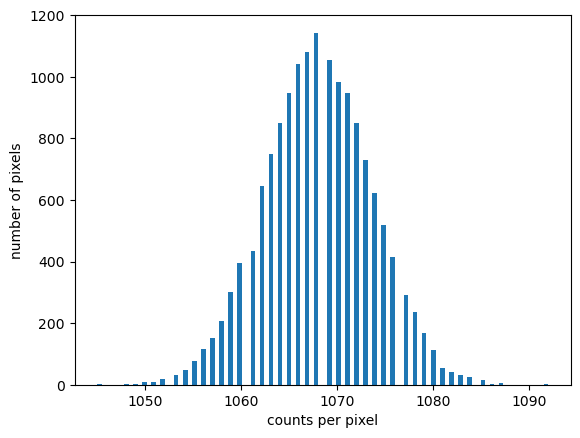

In [3]:
#restrict the file x = data.flatten

#plotting the histogram of bias data
plt.hist(data[:,15:30].flatten(), bins = 100)

#labeling the sides and then displaying
plt.xlabel('counts per pixel')
plt.ylabel('number of pixels')
plt.savefig('ccd_pt2_1dhisto.pdf')
plt.show()

Text(0.5, 1.0, 'Historgram bias compliment')

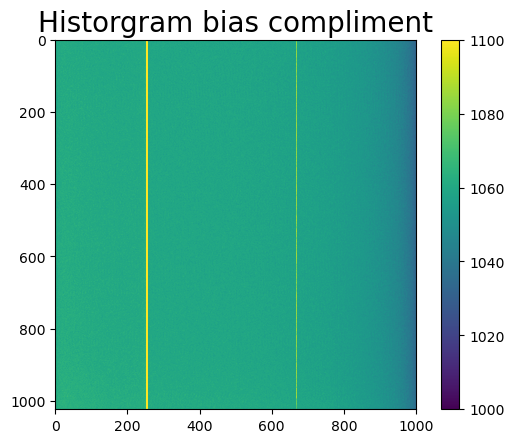

In [18]:
#pt 3_bias

#doing the same thing as the 1st cell, pulling the rest of the bias files
hdul1 = fits.open('bias02.fits')
hdul2 = fits.open('bias03.fits')
hdul3 = fits.open('bias04.fits')
hdul4 = fits.open('bias05.fits')

#putting the specific data into vars
data1 = hdul1[0].data
data2 = hdul2[0].data
data3 = hdul3[0].data
data4 = hdul4[0].data

#stacking all the bias files
totbias = np.stack((data, data1, data2, data3, data4))


#getting the median of the total stack files
master_bias = np.median(totbias, axis = 0)

#showing the file
plt.imshow(master_bias, cmap = ('viridis'), vmin = 1000, vmax = 1100)
plt.xlim(0,1000)
plt.colorbar()
plt.savefig('ccd_masterbias.pdf')

plt.title('Historgram bias compliment', fontsize='20')


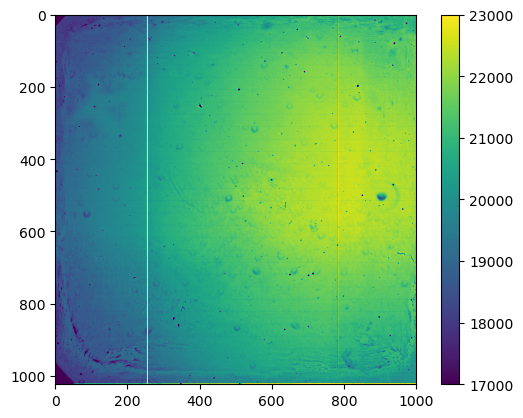

In [17]:
#pt3 for flat

#opening all the flat fit files
h0 = fits.open('flat01.fits')
h1 = fits.open('flat02.fits')
h2 = fits.open('flat03.fits')
h3 = fits.open('flat04.fits')
h4 = fits.open('flat05.fits')

#setting the dark data pixel files to variables
d0 = h0[0].data
d1 = h1[0].data
d2 = h2[0].data
d3 = h3[0].data
d4 = h4[0].data

#stacking all the fit files
totflat = np.stack((d0, d1, d2, d3, d4))

#getting the median of the stack fit files
master_flat = np.median(totflat, axis = 0)

#showing the master_dark
plt.imshow(master_flat, cmap = ('viridis'), vmin = 17000, vmax= 23000)
plt.xlim(0,1000)
plt.colorbar()
plt.savefig('ccd_masterflat.pdf')

plt.show()

#pt 3b
clean_flat = master_flat - master_bias

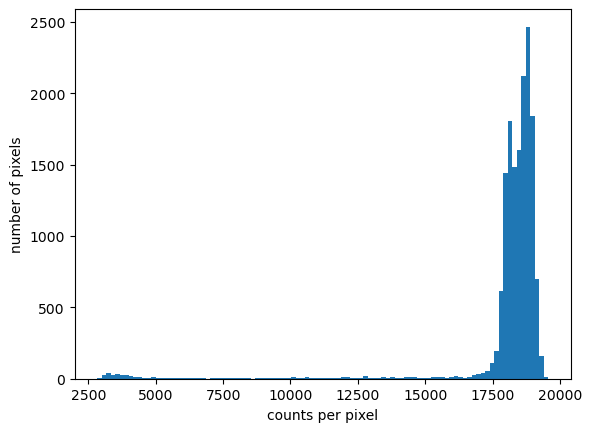

In [6]:
#pt3 flat
#difference range for fits, checking it out
plt.hist(d0[:,15:30].flatten(), bins = 100)

#labeling the sides and then displaying
plt.xlabel('counts per pixel')
plt.ylabel('number of pixels')
plt.show()

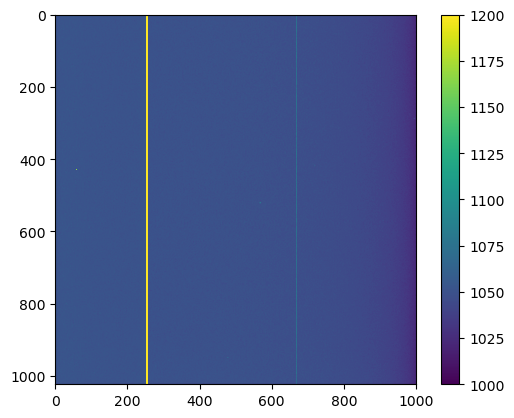

In [7]:
#pt 3 for dark

#opening all the dark fit files
h5 = fits.open('dark01.fits')
h6 = fits.open('dark02.fits')
h7 = fits.open('dark03.fits')
h8 = fits.open('dark04.fits')
h9 = fits.open('dark05.fits')

#setting the dark data pixel files to variables
d5 = h5[0].data
d6 = h6[0].data
d7 = h7[0].data
d8 = h8[0].data
d9 = h9[0].data

#stacking all the fit files
totdark = np.stack((d5, d6, d7, d8, d9))

#getting the median of the stack fit files
master_dark = np.median(totdark, axis = 0)

#showing the master_dark
plt.imshow(master_dark, cmap = ('viridis'), vmin = 1000, vmax = 1200)
plt.xlim(0,1000)
plt.colorbar()
plt.savefig('ccd_masterdark.pdf')

plt.show()

C:\Users\littl\AppData\Local\Temp\ipykernel_24044\3863456931.py:6: RuntimeWarning: invalid value encountered in true_divide
  normalize = clean_flat/flatmean


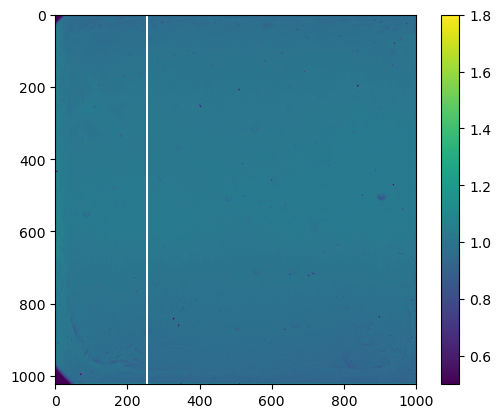

In [15]:
#p4
#normalizing the clean_flat

#getting the flatmean from the flat stack, then dividing clean_flat/flat mean
flatmean = np.mean(clean_flat, axis= 0)
normalize = clean_flat/flatmean

#imagenormalize

plt.imshow(normalize, cmap = 'viridis', vmin = .5, vmax = 1.8)
plt.xlim(0,1000)
plt.colorbar()

plt.savefig('ccd_normalize.pdf')

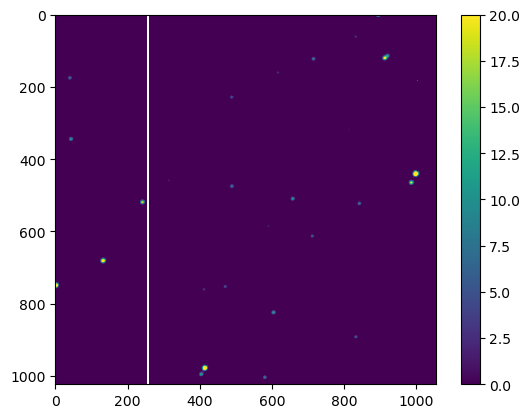

In [11]:

#p5 all of sci have 30 exp time
hsci0 = fits.open('science01.fits')
hsci1 = fits.open('science02.fits')
hsci2 = fits.open('science03.fits')
hsci3 = fits.open('science04.fits')
hsci4 = fits.open('science05.fits')

#get the data for each of the fit files
d0 = hsci0[0].data
d1 = hsci1[0].data
d2 = hsci2[0].data
d3 = hsci3[0].data
d4 = hsci4[0].data


#cleaning each science fit - the master bias
clean_science = d0 - master_bias
clean_science1 =  d1 - master_bias
clean_science2 = d2 - master_bias
clean_science3 = d3 - master_bias
clean_science4 = d4 - master_bias

#getting the cleanscience fit and dividing by the exposure tiem
persec_science = clean_science/30
persec_science1 = clean_science1/30
persec_science2 = clean_science2/30
persec_science3 = clean_science3/30
persec_science4 = clean_science4/30

#taking the stack of each of the persec, then getting the median
totsci = np.stack((persec_science, persec_science1,persec_science2, persec_science3, persec_science4))
master_science = np.median(totsci, axis = 0)

#taking master_science/normalize
calibrate_science = master_science/normalize

#showing the plots

plt.imshow(calibrate_science, cmap = 'viridis', vmin = 0, vmax = 20)
plt.colorbar()
plt.savefig("calibrate_science.pdf")

plt.show()